# load data 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
jtplot.style(ticks=True, grid=False, figsize=(6.5, 5))

import pandas as pd
import numpy as np
import pickle

In [2]:
date_cols = ['reg_mon','auditing_date','due_date']#,'repay_date']
train_xy = pd.read_csv("../data_preprocess/train_set_nobehavior.csv",parse_dates = date_cols)

train_xy.loc[:,date_cols] = train_xy[date_cols].apply(lambda s: [t.timestamp() for t in s] )

In [3]:
train_xy['repay_amt'].fillna(0,inplace=True)
train_xy['repay_date_delta'].fillna(40,inplace=True)
train_xy[['repay_date','repay_amt','repay_date_delta','y']].head()
# (train_xy['due_amt']==train_xy['repay_amt']).value_counts()

,repay_date,repay_amt,repay_date_delta,y
0,2019-01-11,634.1695,25.0,0
1,2018-11-04,927.0431,30.0,0
2,2018-07-06,509.3960,30.0,0
3,2019-01-08,634.1695,31.0,0
4,2018-02-11,1013.0686,28.0,0


In [4]:
# X = train_xy.drop(['reg_mon','auditing_date','due_date','repay_date','behavior_time','repay_amt','y1'],axis=1)
X = train_xy.drop(['repay_date','repay_amt','y','repay_date_delta'],axis=1)
y = train_xy["repay_date_delta"]

label = train_xy['y']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

train_x,test_x,train_y,test_y = train_test_split(X,y,stratify=label)
sfk = StratifiedKFold(n_splits=3,shuffle=True,random_state=111)

# define metrics

In [6]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score

In [7]:
def eval_info(model,y_true,y_pred):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    mae = mean_absolute_error(y_true,y_pred)
    evs = explained_variance_score(y_true,y_pred)
    r2 = r2_score(y_true,y_pred)
    
    print("-----the best model eval info-----\n",
            "RMSE:{}\n".format(rmse),
            "MAE:{}\n".format(mae),
            "evs:{}\n".format(evs),
            "R2:{}\n".format(r2)
         )
    

# single model

## Ridge Regression

In [8]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

### train

In [ ]:
param_grid =  {
            'alpha':[0.01,0.1,0.05],
#             'max_iter':[350],
            'normalize':[False,True],
            'random_state':[666],      
}

Ridge = GridSearchCV(Ridge(),param_grid,cv=sfk,scoring='neg_mean_squared_error')
Ridge.fit(train_x,train_y)

print(" best score: %f \n best model: %s" % (Ridge.best_score_, Ridge.best_estimator_))

Ridge_best = Ridge.best_estimator_
y_pred =Ridge_best.predict(test_x)

model_score = Ridge_best.score(test_x,test_y)

eval_info(Ridge_best,test_y,y_pred)

print("model_score:",model_score)

print("ridge model parameters shape:",Ridge_best.coef_.shape,"\n",
     "count of non-zero elements:",np.count_nonzero(Ridge_best.coef_))

F:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.272083e-23
  overwrite_a=True).T
F:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.274504e-23
  overwrite_a=True).T
F:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.267744e-23
  overwrite_a=True).T
F:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.272024e-22
  overwrite_a=True).T
F:\Anaconda3\lib\site-packages\sklearn\linear_model\ridg

 best score: -65.192346 
 best model: Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=666, solver='auto', tol=0.001)
-----the best model eval info-----
 RMSE:8.0946771955855
 MAE:5.262003681229823
 evs:0.035214200927843886
 R2:0.03521279174570535

model_score: 0.03521279174570535
ridge model parameters shape: (69,) 
 count of non-zero elements: 67


### save

In [ ]:
# save model
with open("../save_models/Ridge.txt",'wb') as f:
    pickle.dump(Ridge_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
Ridge_cv_mse = cross_val_score(Ridge_best,X,y,cv=5,scoring="neg_mean_squared_error")
print("mse",Ridge_cv_mse)

F:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.930763e-22
  overwrite_a=True).T
F:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.209246e-22
  overwrite_a=True).T
F:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-cond

mse [-60.20938693 -56.69560705 -62.40126526 -68.40808488 -87.37110052]


### predict

In [71]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = LR_best.predict(test_all)
y_pred_prob = LR_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_LR.csv",header=True)

0    7900
1    2100
dtype: int64


## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

### train

In [ ]:
param_grid =  {
            'alpha':[0.01,0.1,0.05],
#             'max_iter':[350],
            'normalize':[False],
            'positive':[False],
            'random_state':[666],      
}

Lasso = GridSearchCV(Lasso(),param_grid,cv=sfk,scoring='neg_mean_squared_error')
Lasso.fit(train_x,train_y)

print(" best score: %f \n best model: %s" % (Lasso.best_score_, Lasso.best_estimator_))

Lasso_best = Lasso.best_estimator_
y_pred =Lasso_best.predict(test_x)

model_score = Lasso_best.score(test_x,test_y)

eval_info(Lasso_best,test_y,y_pred)

print("model_score:",model_score)

print("Lasso model parameters shape:",Lasso_best.coef_.shape,"\n",
     "count of non-zero elements:",np.count_nonzero(Lasso_best.coef_))

F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

 best score: -65.524395 
 best model: Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=666,
   selection='cyclic', tol=0.0001, warm_start=False)
-----the best model eval info-----
 RMSE:8.115536845086618
 MAE:5.31308284016237
 evs:0.030236287146416463
 R2:0.030233951125701153

model_score: 0.030233951125701153
Lasso model parameters shape: (69,) 
 count of non-zero elements: 29


### save

In [ ]:
# save model
with open("../save_models/Lasso.txt",'wb') as f:
    pickle.dump(Lasso_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
Lasso_cv_mse = cross_val_score(Lasso_best,X,y,cv=5,scoring="neg_mean_squared_error")
print("mse",Lasso_cv_mse)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

mse [-60.19509678 -57.05453651 -62.75714284 -68.76275562 -87.61997556]


### predict

## ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

### train

In [ ]:
param_grid =  {
            'alpha':[0.01,0.1,0.05],
            'l1_ratio':[0.5,0.4,0.6],
#             'normalize':[False],
            'random_state':[666],      
}

ElasticNet = GridSearchCV(ElasticNet(),param_grid,cv=sfk,scoring='neg_mean_squared_error')
ElasticNet.fit(train_x,train_y)

print(" best score: %f \n best model: %s" % (ElasticNet.best_score_, ElasticNet.best_estimator_))

ElasticNet_best = ElasticNet.best_estimator_
y_pred =ElasticNet_best.predict(test_x)

model_score = ElasticNet_best.score(test_x,test_y)

eval_info(ElasticNet_best,test_y,y_pred)

print("model_score:",model_score)

print("ElasticNet model parameters shape:",ElasticNet_best.coef_.shape,"\n",
     "count of non-zero elements:",np.count_nonzero(ElasticNet_best.coef_))

F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

 best score: -65.498574 
 best model: ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.4,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=666, selection='cyclic', tol=0.0001, warm_start=False)
-----the best model eval info-----
 RMSE:8.113619301291553
 MAE:5.311252280353336
 evs:0.030694424241311857
 R2:0.030692170764195836

model_score: 0.030692170764195836
ElasticNet model parameters shape: (69,) 
 count of non-zero elements: 42


### save

In [ ]:
# save model
with open("../save_models/ElasticNet.txt",'wb') as f:
    pickle.dump(ElasticNet_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
ElasticNet_cv_mse = cross_val_score(ElasticNet_best,X,y,cv=5,scoring="neg_mean_squared_error")
print("mse",ElasticNet_cv_mse)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

mse [-60.15594042 -57.02771266 -62.73085505 -68.73341374 -87.59144254]


### predict

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

### train

In [ ]:
param_grid = {"criterion":['mse'],
               "max_depth":[6,8,10],
                'max_features':[0.9,0.6,0.5],
#               "min_impurity_decrease":[0],
#              "min_samples_split":[2],
#               "min_samples_leaf":[1], # 样本量不大不需管
#               "max_leaf_nodes":[19],
#               'min_weight_fraction_leaf':[0.04],
              'random_state':[666],
             }
DTR = GridSearchCV(DecisionTreeRegressor(),param_grid,cv=sfk,scoring='neg_mean_squared_error')
DTR.fit(train_x,train_y)


print(" best score: %f \n best model: %s" % (DTR.best_score_, DTR.best_estimator_))

DTR_best = DTR.best_estimator_
y_pred =DTR_best.predict(test_x)

model_score = DTR_best.score(test_x,test_y)

eval_info(DTR_best,test_y,y_pred)

print("model_score:",model_score)

 best score: -64.814318 
 best model: DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=0.6,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=666, splitter='best')
-----the best model eval info-----
 RMSE:8.062899629897997
 MAE:5.215416854478628
 evs:0.0427767155355917
 R2:0.0427729227756074

model_score: 0.0427729227756074


### save

In [ ]:
# save model
with open("../save_models/DTR.txt",'wb') as f:
    pickle.dump(DTR_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
DTR_cv_mse = cross_val_score(DTR_best,X,y,cv=5,scoring="neg_mean_squared_error")
print("mse",DTR_cv_mse)

mse [-52.08488686 -56.62781555 -62.26406619 -68.76635275 -91.47848138]


### predict

In [75]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = DT_best.predict(test_all)
y_pred_prob = DT_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_DT.csv",header=True)

0    6513
1    3487
dtype: int64


## random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

F:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### train

In [ ]:
param_grid = {
            'criterion':['mse'],
            'n_estimators':[140,100],
#             'max_features':["sqrt"],
            'max_depth':[6,5,4],
#              "min_samples_split":[], # 样本量不大不需管
#               "min_samples_leaf":[], # 样本量不大不需管
#             "max_leaf_nodes":[13,15,20],
#             'min_impurity_decrease':[0],
#             'n_jobs':[-1],
            'random_state':[666],
             }


RFR = GridSearchCV(RandomForestRegressor(),param_grid,cv=sfk,scoring='neg_mean_squared_error')
RFR.fit(train_x,train_y)

print(" best score: %f \n best model: %s" % (RFR.best_score_, RFR.best_estimator_))


RFR_best = RFR.best_estimator_
y_pred =RFR_best.predict(test_x)

model_score = RFR_best.score(test_x,test_y)

eval_info(RFR_best,test_y,y_pred)

print("model_score:",model_score)

### save

In [ ]:
# save model
with open("../save_models/RFR.txt",'wb') as f:
    pickle.dump(RFR_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
RFR_cv_mse = cross_val_score(RFR_best,X,y,cv=5,scoring="neg_mean_squared_error")
print("mse",RFR_cv_mse)

### predict

In [78]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = RF_best.predict(test_all)
y_pred_prob = RF_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_RF.csv",header=True)

0    7957
1    2043
dtype: int64


## extra tree

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

### train

In [ ]:
param_grid = {
            'criterion':['mse'],
            'n_estimators':[80,70,60],
#             'max_features':["sqrt"],
            'max_depth':[7,8,9],
#              "min_samples_split":[], # 样本量不大不需管
#               "min_samples_leaf":[], # 样本量不大不需管
#             "max_leaf_nodes":[13,15,20],
#             'min_impurity_decrease':[0],
#             'n_jobs':[-1],
            'random_state':[666],
             }


ETR = GridSearchCV(ExtraTreesRegressor(),param_grid,cv=sfk,scoring='neg_mean_squared_error')
ETR.fit(train_x,train_y)

print(" best score: %f \n best model: %s" % (ETR.best_score_, ETR.best_estimator_))


ETR_best = ETR.best_estimator_
y_pred =ETR_best.predict(test_x)

model_score = ETR_best.score(test_x,test_y)

eval_info(ETR_best,test_y,y_pred)

print("model_score:",model_score)

### save

In [ ]:
# save model
with open("../save_models/ETR.txt",'wb') as f:
    pickle.dump(ETR_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
ETR_cv_mse = cross_val_score(ETR_best,X,y,cv=5,scoring="neg_mean_squared_error")
print("mse",ETR_cv_mse)

### predict

In [81]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = ET_best.predict(test_all)
y_pred_prob = ET_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_ET.csv",header=True)

0    7964
1    2036
dtype: int64


## xgb-sklearn

In [8]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

### train

In [9]:
param_grid = {
    'booster':['gbtree','gblinear'],
    'objective': ['reg:linear'], # multi:softmax multi:softprob reg:linear
    'eval_metric':['rmse'],
    'n_estimators':[145,80,100],
    'max_depth':[3,4,5],
    'learning_rate':[0.05,0.01],
    'min_child_weight':[5],
    'gamma':[0.05],
    'subsample': [0.8],
    'colsample_bytree': [0.6],
    'reg_alpha': [7],
    'reg_lambda': [5],
#     'scale_pos_weight':[float(len(train_y)-sum(train_y))/float(sum(train_y))],
    'random_state':[0],
#     'n_jobs': [-1],
    'missing': [-1],
    'silent':[True],
    'seed':[666],
}

XGBR = GridSearchCV(XGBRegressor(),param_grid,cv=sfk,scoring='neg_mean_squared_error')
XGBR.fit(train_x,train_y)

print(" best score: %f \n best model: %s" % (XGBR.best_score_, XGBR.best_estimator_))


XGBR_best = XGBR.best_estimator_
y_pred =XGBR_best.predict(test_x)

model_score = XGBR_best.score(test_x,test_y)

eval_info(XGBR_best,test_y,y_pred)

print("model_score:",model_score)

F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base i

F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base i

F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base i

 best score: -63.990075 
 best model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, eval_metric='rmse',
       gamma=0.05, importance_type='gain', learning_rate=0.05,
       max_delta_step=0, max_depth=5, min_child_weight=5, missing=-1,
       n_estimators=145, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=7, reg_lambda=5, scale_pos_weight=1,
       seed=666, silent=True, subsample=0.8, verbosity=1)
-----the best model eval info-----
 RMSE:7.980926680530203
 MAE:5.159998032482286
 evs:0.056221225090230864
 R2:0.05620270878098388

model_score: 0.05620270878098388


### save

In [10]:
# save model
with open("../save_models/XGBR.txt",'wb') as f:
    pickle.dump(XGBR_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
XGBR_cv_mse = cross_val_score(XGBR_best,X,y,cv=5,scoring="neg_mean_squared_error")
print("mse",XGBR_cv_mse)

F:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
F:\Anaconda3\lib\site-packag

mse [-51.52555227 -55.92811671 -61.62595741 -67.24877421 -86.36587775]


### predict

In [86]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = XGB_best.predict(test_all)
y_pred_prob = XGB_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_XGB.csv",header=True)

0    9004
1     996
dtype: int64


F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## xgb:raw interface

### train

F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:28.3582
Will train until train-rmse hasn't improved in 1500 rounds.
[20]	train-rmse:23.6533
[40]	train-rmse:19.893
[60]	train-rmse:16.9159
[80]	train-rmse:14.5871
[100]	train-rmse:12.7935
[120]	train-rmse:11.4362
[140]	train-rmse:10.4287
[160]	train-rmse:9.69563
[180]	train-rmse:9.17096
[200]	train-rmse:8.80137
[220]	train-rmse:8.54382
[240]	train-rmse:8.36647
[260]	train-rmse:8.24449
[280]	train-rmse:8.16109
[300]	train-rmse:8.10377
[320]	train-rmse:8.06468
[340]	train-rmse:8.03744
[360]	train-rmse:8.01831
[380]	train-rmse:8.00476
[400]	train-rmse:7.99512
[420]	train-rmse:7.98803
[440]	train-rmse:7.98264
[460]	train-rmse:7.97857
[480]	train-rmse:7.97529
[500]	train-rmse:7.97255
[520]	train-rmse:7.97016
[540]	train-rmse:7.96808
[560]	train-rmse:7.96619
[580]	train-rmse:7.96451
[600]	train-rmse:7.96298
[620]	train-rmse:7.9614
[640]	train-rmse:7.96007
[660]	train-rmse:7.9587
[680]	train-rmse:7.95747
[700]	train-rmse:7.95616
[720]	train-rmse:7.95489
[740]	train-rmse:7.95371

<module 'matplotlib.pyplot' from 'F:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

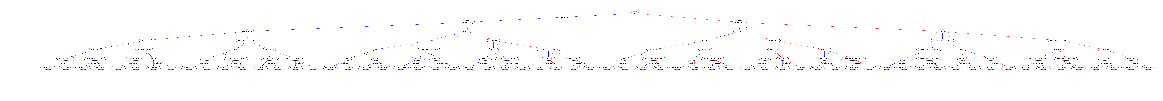

In [65]:
import xgboost as xgb
dtrain = xgb.DMatrix(train_x,label=train_y)
dtest = xgb.DMatrix(test_x)

params = {
            'booster':'gbtree',
            'objective':'reg:squarederror',
#             'scale_pos_weight': float(len(train_y)-sum(train_y))/float(sum(train_y)),
            'eval_metric': 'rmse',
            'gamma':0.08,
            'max_depth':6,
            'alpha':0.9,
            'lambda':0.9,
#             'subsample':0.6,
            'colsample_bytree':0.7,
            'min_child_weight':6, 
            'eta': 0.01,
            'seed':666,
            'silent':1,
            'missing':-1,
        }
# xgb_cv = xgb.cv(params, dtrain, 
#            num_boost_round=1000, 
#            nfold=3, stratified=True,#folds=sfk
#            metrics='auc', maximize=True, 
#            early_stopping_rounds=500, 
#            as_pandas=True, verbose_eval=1, 
#            show_stdv=False, seed=0, shuffle=True)
xgb_model = xgb.train(params,dtrain,num_boost_round=2500,early_stopping_rounds=1500,
                       evals=[(dtrain,"train")],verbose_eval=20)#,maximize=True)
y_pred = xgb_model.predict(dtest)#,ntree_limit=304)

eval_info(xgb_model,test_y,y_pred)

# xgb.plot_importance(xgb_model,max_num_features=20)
plt.figure(figsize=(20,20))
xgb.plot_tree(xgb_model,ax=plt,num_trees=5)

# [1480]	train-rmse:7.87024
# [1499]	train-rmse:7.86934
# -----the best model eval info-----
#  RMSE:7.964367117168188

### save

In [66]:
# save model
with open("../save_models/xgb2.txt",'wb') as f:
    pickle.dump(xgb_model,f)

### predict

In [67]:
test_set = pd.read_csv('../data_preprocess/test_set_nobehavior.csv',parse_dates=['reg_mon','auditing_date','due_date'])
test_set.loc[:,date_cols] = test_set[date_cols].apply(lambda s: [t.timestamp() for t in s] )
dtest_set = xgb.DMatrix(test_set)
test_set_pred_y = xgb_model.predict(dtest_set)

In [68]:
test_set_ = pd.read_csv('../data_preprocess/test_set_nobehavior.csv',parse_dates=['reg_mon','auditing_date','due_date'])

In [69]:
import math
pred_df = pd.concat([test_set_[['listing_id','due_amt','due_date','auditing_date']],
           pd.Series(test_set_pred_y,name='repay_date',index=test_set.index).apply(lambda v:math.ceil(v))],axis=1)

In [70]:
pred_df[pred_df['repay_date']>=32]
from pandas.tseries.offsets import Day
pred_df['repay_date']  = pred_df['repay_date'].apply(lambda x:Day(x))
pred_df['repay_date'] = pred_df['auditing_date']+pred_df['repay_date']

F:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:1129: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeArray not vectorized
  .format(cls=type(self).__name__), PerformanceWarning)


In [71]:
pred_df.loc[(pred_df['repay_date']>pred_df['due_date']),['due_amt','repay_date']] = None
pred_df = pred_df.rename(columns={"due_amt":'repay_amt'}).drop(['due_date','auditing_date'],axis=1)
pred_df

,listing_id,repay_amt,repay_date
0,5348580,NaN,NaT
1,5288930,NaN,NaT
2,5335952,NaN,NaT
3,5382105,NaN,NaT
4,5433181,560.4247,2019-04-12
5,5422932,467.6095,2019-04-08
6,5414862,226.9417,2019-04-04
7,5462399,1450.8678,2019-04-22
8,5480102,220.6568,2019-04-29
9,5424428,290.1735,2019-04-07


In [72]:
pred_df.to_csv("./pred_df_first2.csv",index=False)

## GBDT

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

F:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### train

In [14]:
param_grid = {
#         'loss':['deviance'],
        'n_estimators':[145,100,80],
        'max_depth':[4,3,5],
        'learning_rate':[0.03,0.01],
#         'criterion':['friedman_mse'],#默认
        'subsample': [0.8],
        'max_features':[0.7],
#         "max_leaf_nodes":[8],
#         'min_impurity_decrease':[0],
        'random_state':[666],
}

GBDT = GridSearchCV(GradientBoostingRegressor(),param_grid,cv=sfk,scoring='neg_mean_squared_error')
GBDT.fit(train_x,train_y)

print(" best score: %f \n best model: %s" % (GBDT.best_score_, GBDT.best_estimator_))


GBDT_best = GBDT.best_estimator_
y_pred =GBDT_best.predict(test_x)

model_score = GBDT_best.score(test_x,test_y)

eval_info(GBDT_best,test_y,y_pred)

print("model_score:",model_score)

NameError: name 'GBDTegressor' is not defined

### save

In [ ]:
# save model
with open("../save_models/GBDT.txt",'wb') as f:
    pickle.dump(GBDT_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
GBDT_cv_mse = cross_val_score(GBDT_best,X,y,cv=5,scoring="neg_mean_squared_error")
print("mse",GBDT_cv_mse)

### predict

In [89]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = GBDT_best.predict(test_all)
y_pred_prob = GBDT_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_GBDT.csv",header=True)

0    9995
1       5
dtype: int64


## MLP

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

### train

In [ ]:
param_grid = {
    'hidden_layer_sizes':[(300,),(100,),(200,)],
    'activation':['logistic','relu'],
#     'solver':['adam'],
#     'Note':
    'alpha':[0.012,0.05],
#     'batch_size':
    'learning_rate':['constant',0.01],
#     'learning_rate_init':
#     'power_t':
#     'max_iter':
#     'shuffle':
    'random_state':[666],
#     'tol':
#     'verbose':
#     'warm_start':
#     'momentum':[0.9,0.7],
#     'nesterovs_momentum':
#     'early_stopping':
#     'validation_fraction':
#     'beta_1':
#     'beta_2':
#     'epsilon':
}

MLP = GridSearchCV(MLPRegressor(),param_grid,cv=sfk,scoring='neg_mean_squared_error')
MLP.fit(train_x,train_y)

print(" best score: %f \n best model: %s" % (MLP.best_score_, MLP.best_estimator_))


MLP_best = MLP.best_estimator_
y_pred =MLP_best.predict(test_x)

model_score = MLP_best.score(test_x,test_y)

eval_info(MLP_best,test_y,y_pred)

print("model_score:",model_score)

### save

In [ ]:
# save model
with open("../save_models/MLP.txt",'wb') as f:
    pickle.dump(MLP_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
MLP_cv_mse = cross_val_score(MLP_best,X,y,cv=5,scoring="neg_mean_squared_error")
print("mse",MLP_cv_mse)

### predict

In [92]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = MLP_best.predict(test_all)
y_pred_prob = MLP_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_MLP.csv",header=True)

0    10000
dtype: int64


## adaboost

### train

best score: 0.797058 
 best model: AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=140, n_jobs=1, oob_score=False, random_state=222,
            verbose=0, warm_start=False),
          learning_rate=0.05, n_estimators=270, random_state=999)
------AdaBoostClassifier classification_report------
              precision    recall  f1-score   support

          0       0.98      0.83      0.90      3541
          1       0.15      0.62      0.24       172

avg / total       0.94      0.82      0.87      3713

auc: 0.8046669249916264
train_score: 0.8442475757212977 
 test_score: 0.8168596821976838


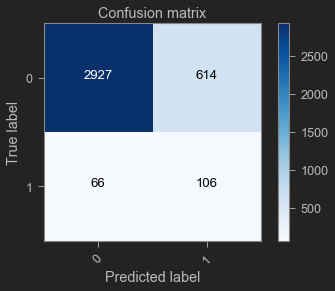

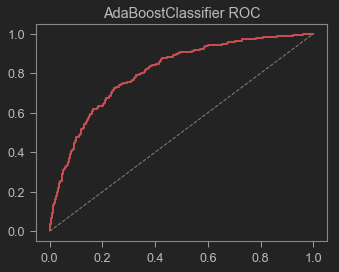

In [141]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'base_estimator':[RF_best],
    'n_estimators':[270],
    'learning_rate':[0.05],
    'random_state':[999],
}

ADAB = GridSearchCV(AdaBoostClassifier(),param_grid,cv=sfk,scoring="roc_auc")
ADAB.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (ADAB.best_score_,ADAB.best_estimator_))

ADAB_best = ADAB.best_estimator_
train_score = ADAB_best.score(train_x,train_y)
test_score = ADAB_best.score(test_x,test_y)
y_pred = ADAB_best.predict(test_x)
y_pred_prob = ADAB_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(ADAB_best,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

### save

In [142]:
# save model
import pickle
with open("./best_models/ADAB_RF_pkl.txt",'wb') as f:
    pickle.dump(ADAB_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
ADAB_cv_auc = cross_val_score(ADAB_best,X,y,cv=5,scoring="roc_auc")
print("best_ADAB_cv_auc:",ADAB_cv_auc)

best_ADAB_cv_auc: [0.8104355  0.82646391 0.82957119 0.7907972  0.81782743]


### predict

In [143]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = ADAB_best.predict(test_all)
y_pred_prob = ADAB_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_ADAB_RF.csv",header=True)

0    9448
1     552
dtype: int64


## SVM

In [ ]:
# svm_train_xy = pd.read_csv("F:./resample data/under_resample1.csv",index_col=['cust_id'])
# svm_y = svm_train_xy.y
# svm_X = svm_train_xy.drop('y',axis=1)
# svm_train_x,svm_test_x,svm_train_y,svm_test_y = train_test_split(svm_X,svm_y,stratify=svm_y)
# sfk = StratifiedKFold(n_splits=3)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

### train

In [ ]:
param_grid = {
            'C':[0.5,0.1,1],
            'kernel':['rbf'],
#             'class_weight':["balanced"],
            'gamma':[0.03,0.01,0.1],
#             'shrinking':[True],
             }
# SVR(C=0.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.03,
#   kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR = GridSearchCV(SVR(),param_grid,cv=sfk,scoring='neg_mean_squared_error')
SVR.fit(train_x,train_y)

print(" best score: %f \n best model: %s" % (SVR.best_score_, SVR.best_estimator_))


SVR_best = SVR.best_estimator_
y_pred =SVR_best.predict(test_x)

model_score = SVR_best.score(test_x,test_y)

eval_info(SVR_best,test_y,y_pred)

print("model_score:",model_score)

### save 

In [ ]:
# save model
with open("../save_models/SVR.txt",'wb') as f:
    pickle.dump(SVR_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
SVR_cv_mse = cross_val_score(SVR_best,X,y,cv=5,scoring="neg_mean_squared_error")
print("mse",SVR_cv_mse)

### predict

# bagging xgb_best

In [ ]:
from sklearn.ensemble import BaggingRegressor

## train

In [ ]:
bagging_xgb = BaggingRegressor(XGBR_best,n_estimators=10)

bagging_xgb.fit(train_x,train_y)
y_pred = bagging_xgb.predict(test_x)

model_score = bagging_xgb.score(test_x,test_y)
eval_info(bagging_xgb,test_y,y_pred)

print("model score: ",model_score)

## save

In [ ]:
# save model
with open("../save_models/bagging_xgb.txt",'wb') as f:
    pickle.dump(bagging_xgb,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
bagging_xgb_cv_mse = cross_val_score(bagging_xgb_best,X,y,cv=5,scoring="neg_mean_squared_error")
print("mse",bagging_xgb_cv_mse)

## predict

# bagging xgb:sklearn(vary params)

In [ ]:
n_estimators = [142,145,148] 
max_depth = [2,3,4] 
learning_rate = np.linspace(0.045,0.055,10) 
min_child_weight= [5,4,6] 
gamma = np.linspace(0.045,0.055,10)
subsample = [0.7,0.75,0.8,0.85]
colsample_bytree = [0.6,0.65,0.7,0.75]
reg_alpha =[6,7,8]
reg_lambda = [4,5,6]
random_state = np.arange(1000,10000,100)

np.random.shuffle(n_estimators)
np.random.shuffle(max_depth)
np.random.shuffle(learning_rate)
np.random.shuffle(min_child_weight)
np.random.shuffle(gamma)
np.random.shuffle(subsample)
np.random.shuffle(colsample_bytree)
np.random.shuffle(reg_alpha)
np.random.shuffle(reg_lambda)
np.random.shuffle(random_state)

prob_df = pd.DataFrame([],index=test_x.index)
for i in range(30):
    param_grid = {
        'booster':'gbtree',
        'objective': 'reg:linear',
        'n_estimators':n_estimators[i%3],
        'max_depth':max_depth[i%3],
        'learning_rate':learning_rate[i%10],
        'min_child_weight':min_child_weight[i%3],
        'gamma':gamma[i%10],
        'subsample':subsample[i%4],
        'colsample_bytree': colsample_bytree[i%4],
        'reg_alpha':reg_alpha[i%3],
        'reg_lambda': reg_lambda[i%3],
#         'scale_pos_weight':float(len(train_y)-sum(train_y))/float(sum(train_y)),
        'random_state':random_state[i],
#     'n_jobs': [-1],
        'missing': -1,
        'silent':True,
    }

#     bagging_xgb = BaggingClassifier(XGBClassifier().set_params(**param_grid),n_estimators=10)
    # bagging_xgb = BaggingClassifier(XGB_best,n_estimators=10)
#     bagging_xgb.fit(train_x,train_y)
    xgb_ = XGBClassifier().set_params(**param_grid)
    xgb_.fit(train_x,train_y)
    y_pred = xgb_.predict(test_x)
    y_prob_s = pd.Series(y_pred,index=test_x.index)
    prob_df = pd.concat([prob_df,y_prob_s],axis=1)

y_pred_mean = prob_df.mean(axis=1)
eval_info(xgb_,test_y,y_pred_mean)


# xgb+lr

[0]	train-auc:0.75003
Will train until train-auc hasn't improved in 304 rounds.
[20]	train-auc:0.825611
[40]	train-auc:0.833463
[60]	train-auc:0.837016
[80]	train-auc:0.840613
[100]	train-auc:0.843919
[120]	train-auc:0.84783
[140]	train-auc:0.851898
[160]	train-auc:0.855635
[180]	train-auc:0.859144
[200]	train-auc:0.862247
[220]	train-auc:0.866045
[240]	train-auc:0.868845
[260]	train-auc:0.871496
[280]	train-auc:0.874424
[300]	train-auc:0.87775
[320]	train-auc:0.880032
[340]	train-auc:0.883009
[360]	train-auc:0.885558
[380]	train-auc:0.888023
[400]	train-auc:0.890347
[420]	train-auc:0.892764
[440]	train-auc:0.895291
[460]	train-auc:0.897798
[480]	train-auc:0.90019
[499]	train-auc:0.90214
best score: 0.899969 
 best model: LogisticRegression(C=0.06, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=80,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=666,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
--

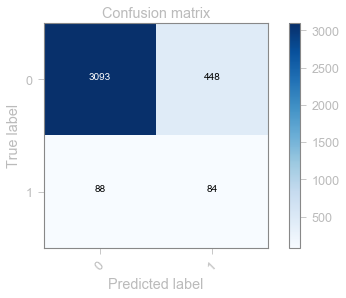

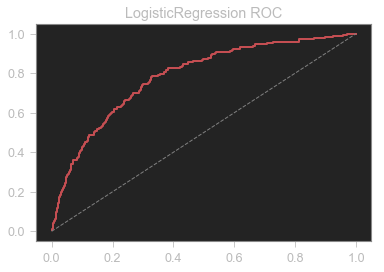

In [133]:
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder

dtrain = xgb.DMatrix(train_x,label=train_y)
dtest = xgb.DMatrix(test_x)
one_hot = OneHotEncoder()

params = {
            'booster':'gbtree',
            'objective': 'binary:logistic',
            'scale_pos_weight': float(len(train_y)-sum(train_y))/float(sum(train_y)),
            'eval_metric': 'auc',
            'gamma':0.05,
            'max_depth':3,
            'alpha':7,
            'lambda':5,
            'subsample':0.8,
            'colsample_bytree':0.6,
            'min_child_weight':5, 
            'eta': 0.02,
            'seed':0,
            'silent':1,
            'missing':-1,
        }

xgb_model = xgb.train(params,dtrain,num_boost_round=500,early_stopping_rounds=304,
                       evals=[(dtrain,"train")],verbose_eval=20,maximize=True)

train_leaf = xgb_model.predict(dtrain,ntree_limit=304,pred_leaf=True)
test_leaf = xgb_model.predict(dtest,ntree_limit=304,pred_leaf=True)

train_leaf_hot = one_hot.fit_transform(train_leaf)
test_leaf_hot = one_hot.transform(test_leaf)
     

param_grid =  {
            'penalty':['l2'],
            'C':[0.06],
            'solver':['lbfgs'],#['newton-cg','sag'],#l2
#             'solver':['liblinear'],#,'saga',],#l1
            'max_iter':[80],
            'class_weight':['balanced'],
#             'fit_intercept':[True],
            'random_state':[666],      
}

xgbLR = GridSearchCV(LogisticRegression(),param_grid,cv=sfk,scoring='roc_auc')
xgbLR.fit(train_leaf_hot,train_y)

print("best score: %f \n best model: %s" % (xgbLR.best_score_,xgbLR.best_estimator_))
xgbLR_best = xgbLR.best_estimator_

train_score = xgbLR_best.score(train_leaf_hot,train_y)
test_score = xgbLR_best.score(test_leaf_hot,test_y)
y_pred = xgbLR_best.predict(test_leaf_hot)
y_pred_prob = xgbLR_best.predict_proba(test_leaf_hot)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(xgbLR_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

# bagging dt

best score: 0.789294 
 best model: BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,
            max_features=0.8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.04, presort=False, random_state=233,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.7,
         max_samples=0.8, n_estimators=80, n_jobs=1, oob_score=False,
         random_state=777, verbose=0, warm_start=False)
------BaggingClassifier classification_report------
              precision    recall  f1-score   support

          0       0.98      0.69      0.81      3541
          1       0.11      0.76      0.19       172

avg / total       0.94      0.70      0.79      3713

auc: 0.794160432935119
train_score: 0.7131569495989465 
 test_score: 0.6978184756261783


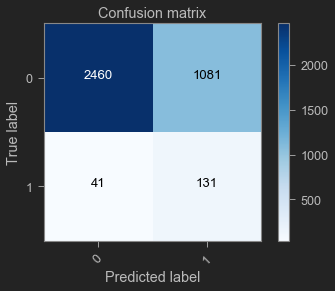

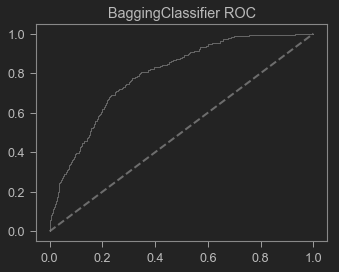

In [110]:
from sklearn.ensemble import BaggingClassifier
param_grid = {
    'base_estimator':[DT_best],#LR_best,SVC_best,GBDT_best],
    'n_estimators':[80],
    'max_samples':[0.8],
    'max_features':[0.7],
    'random_state':[777],
}

BAGG = GridSearchCV(BaggingClassifier(),param_grid,cv=sfk,scoring="roc_auc")
BAGG.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (BAGG.best_score_,BAGG.best_estimator_))
BAGG_best = BAGG.best_estimator_
train_score = BAGG_best.score(train_x,train_y)
test_score = BAGG_best.score(test_x,test_y)
y_pred = BAGG_best.predict(test_x)
y_pred_prob = BAGG_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(BAGG_best,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

# bagging lr

F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


best score: 0.801813 
 best model: BaggingClassifier(base_estimator=LogisticRegression(C=0.035, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=350,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=666,
          solver='saga', tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=777, verbose=0, warm_start=False)
------BaggingClassifier classification_report------
              precision    recall  f1-score   support

          0       0.99      0.73      0.84      3541
          1       0.12      0.77      0.21       172

avg / total       0.95      0.73      0.81      3713

auc: 0.8116696111333679
train_score: 0.7323576943796014 
 test_score: 0.7322919472124967


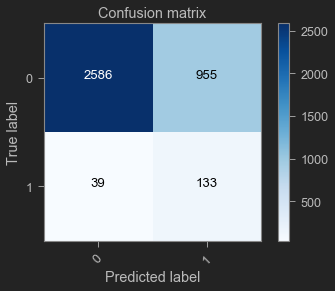

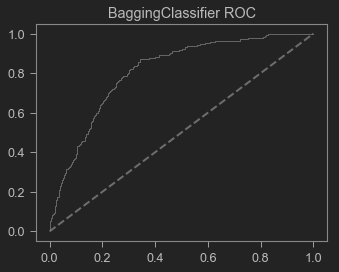

In [96]:
from sklearn.ensemble import BaggingClassifier
param_grid = {
    'base_estimator':[LR_best],#SVC_best,GBDT_best],
#     'n_estimators':[80],
#     'max_samples':[0.8],
#     'max_features':[0.7],
    'random_state':[777],
}

BAGG = GridSearchCV(BaggingClassifier(),param_grid,cv=sfk,scoring="roc_auc")
BAGG.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (BAGG.best_score_,BAGG.best_estimator_))
BAGG_best = BAGG.best_estimator_
train_score = BAGG_best.score(train_x,train_y)
test_score = BAGG_best.score(test_x,test_y)
y_pred = BAGG_best.predict(test_x)
y_pred_prob = BAGG_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(BAGG_best,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

# voting 

F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


best score: 0.810093 
 best model: VotingClassifier(estimators=[('lr', LogisticRegression(C=0.035, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=350,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=666,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)), ('mlp', MLPC...         presort='auto', random_state=1, subsample=0.8, verbose=0,
              warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft',
         weights=[2, 5, 1, 1, 6, 5])


F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


------VotingClassifier classification_report------
              precision    recall  f1-score   support

          0       0.96      0.98      0.97      3541
          1       0.26      0.12      0.17       172

avg / total       0.93      0.94      0.93      3713

auc: 0.8318320931546075
train_score: 0.9525947207757227 
 test_score: 0.9429033126851603


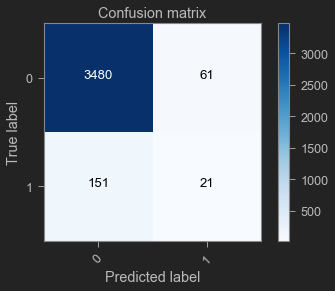

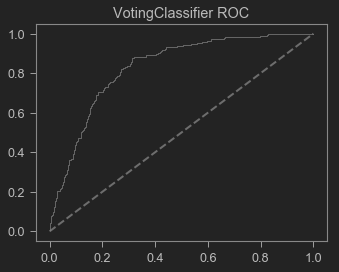

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
param_grid ={
    'voting':['soft'],
    'weights':[
               [2,5,1,1,6,5],
    ]
}

estimators = [ ('lr', LR_best),('mlp',MLP_best), 
               ('rf', RF_best),('et', ET_best) ,
               ('xgb',XGB_best),('gbdt',GBDT_best)
             ]

voting =GridSearchCV(VotingClassifier(estimators),param_grid,cv=sfk,scoring="roc_auc")
voting.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (voting.best_score_,voting.best_estimator_))
voting_best = voting.best_estimator_
train_score = voting_best.score(train_x,train_y)
test_score = voting_best.score(test_x,test_y)
y_pred = voting_best.predict(test_x)
y_pred_prob = voting_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(voting_best,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

In [98]:
# save model
import pickle
with open("./best_models/voting_pkl.txt",'wb') as f:
    pickle.dump(voting_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
voting_cv_auc = cross_val_score(voting_best,X,y,cv=5,scoring="roc_auc")
print("best_voting_cv_auc:",voting_cv_auc)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


best_voting_cv_auc: [0.81424925 0.83561827 0.82768003 0.80047202 0.82719307]


In [99]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = voting_best.predict(test_all)
y_pred_prob = voting_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_voting.csv",header=True)

F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0    9969
1      31
dtype: int64


best score: 0.810510 
 best model: VotingClassifier(estimators=[('xgb', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.05, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=5, missing=-1,
       n_estimators=145, n_jobs=1, nthread=None,
       objective='binary:logist...         presort='auto', random_state=1, subsample=0.8, verbose=0,
              warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft',
         weights=[1, 2, 4, 4])


F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


------VotingClassifier classification_report------
              precision    recall  f1-score   support

          0       0.96      0.99      0.98      3541
          1       0.41      0.08      0.14       172

avg / total       0.93      0.95      0.94      3713

auc: 0.8195572791814163
train_score: 0.9562758125336686 
 test_score: 0.952060328575276


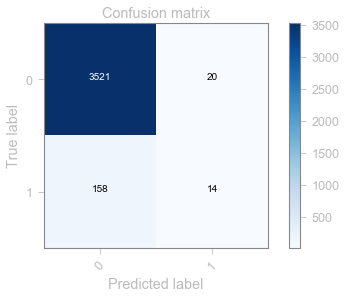

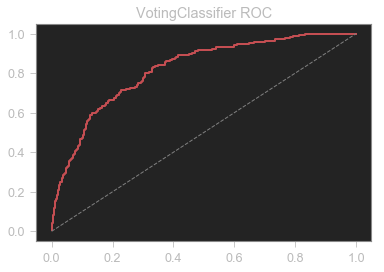

In [154]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
param_grid ={
    'voting':['soft'],
    'weights':[
               [1,2,4,4],
    ]
}

estimators = [ ('xgb', XGB_best),('bagging_xgb', bagging_xgb),
              ('mlp',MLP_best),('gbdt',GBDT_best)
             ]

voting =GridSearchCV(VotingClassifier(estimators),param_grid,cv=sfk,scoring="roc_auc")
voting.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (voting.best_score_,voting.best_estimator_))
voting_best = voting.best_estimator_
train_score = voting_best.score(train_x,train_y)
test_score = voting_best.score(test_x,test_y)
y_pred = voting_best.predict(test_x)
y_pred_prob = voting_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(voting_best,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

# GBDT+LR

F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


------LogisticRegression classification_report------
              precision    recall  f1-score   support

          0       0.98      0.63      0.77      3541
          1       0.09      0.70      0.15       172

avg / total       0.94      0.64      0.74      3713

auc: 0.7218874578853695
train_score: 0.9525947207757227 
 test_score: 0.9429033126851603


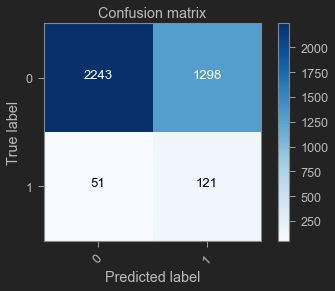

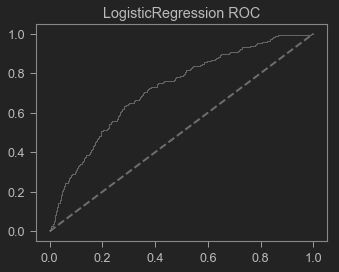

In [100]:
train_x,test_x,train_y,test_y = train_test_split(X,y,stratify=y)
train_x,train_x_lr,train_y,test_y_lr = train_test_split(train_x,train_y,stratify=train_y)

from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()

GBDT_best.fit(train_x,train_y)
one_hot.fit(GBDT_best.apply(train_x)[:,:,0])
LR_best.fit(one_hot.transform(GBDT_best.apply(train_x_lr)[:,:,0]),test_y_lr)

y_pred = LR_best.predict(one_hot.transform(GBDT_best.apply(test_x)[:,:,0]))
y_pred_prob = LR_best.predict_proba(one_hot.transform(GBDT_best.apply(test_x)[:,:,0]))[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(LR_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

In [ ]:
GBDT_best.apply(train_x)[:,:,0]

best score: 0.795128 
 best model: LogisticRegression(C=0.06, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=50,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=666,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
------LogisticRegression classification_report------
              precision    recall  f1-score   support

          0       0.98      0.74      0.84      3541
          1       0.12      0.72      0.20       172

avg / total       0.94      0.74      0.81      3713

auc: 0.7910523239394994
train_score: 0.7651705565529623 
 test_score: 0.7368704551575546


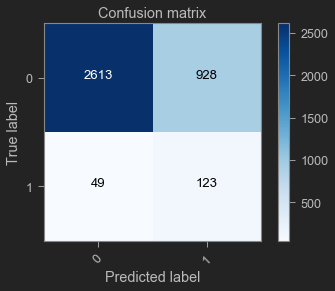

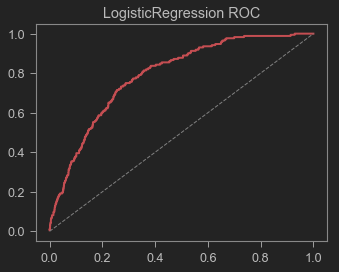

In [175]:
train_x,test_x,train_y,test_y = train_test_split(X,y,stratify=y)
train_x,train_x_lr,train_y,train_y_lr = train_test_split(train_x,train_y,stratify=train_y)

from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()

GBDT_best.fit(train_x,train_y)
one_hot.fit(GBDT_best.apply(train_x)[:,:,0])
train_x_lr = one_hot.transform(GBDT_best.apply(train_x_lr)[:,:,0])
test_x_lr = one_hot.transform(GBDT_best.apply(test_x)[:,:,0])
                               
param_grid =  {
            'penalty':['l1'],#'l2'],
            'C':[0.06],
#             'solver':['newton-cg','lbfgs','sag'],#l2
            'solver':['liblinear'],#,'saga',],#l1
            'max_iter':[50],
            'class_weight':['balanced'],
#             'fit_intercept':[True],
            'random_state':[666],      
}

GBLR = GridSearchCV(LogisticRegression(),param_grid,cv=sfk,scoring='roc_auc')
GBLR.fit(train_x_lr,train_y_lr)

print("best score: %f \n best model: %s" % (GBLR.best_score_, GBLR.best_estimator_))
GBLR_best = GBLR.best_estimator_

train_score = GBLR_best.score(train_x_lr,train_y_lr)
test_score = GBLR_best.score(test_x_lr,test_y)
y_pred = GBLR_best.predict(test_x_lr)
y_pred_prob = GBLR_best.predict_proba(test_x_lr)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(GBLR_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

# FM

In [ ]:
# from fastFM import sgd
# fm = sgd.FMClassification(n_iter=1000, init_stdev=0.1, l2_reg_w=0,
#                               l2_reg_V=0, rank=2, step_size=0.1)
# fm.fit(train_x,train_y)
# y_pred = fm.predict(test_x)
# y_pred_prob = fm.predict_proba(test_x)

# cm = confusion_matrix(test_y,y_pred)

# eval_info(fm,test_y,y_pred_prob,cm)
# print( "train_score:",train_score,"\n","test_score:",test_score)


# LDA

F:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
F:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
F:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
F:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
F:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
F:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
F:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear


best score: 0.779201 
 best model: QuadraticDiscriminantAnalysis(priors=2, reg_param=0.911,
               store_covariance=False, store_covariances=None, tol=0.0001)
------QuadraticDiscriminantAnalysis classification_report------
              precision    recall  f1-score   support

          0       0.98      0.71      0.83      3541
          1       0.11      0.74      0.19       172

avg / total       0.94      0.71      0.80      3713

auc: 0.7943213387362655
train_score: 0.7164661519123721 
 test_score: 0.713977915432265


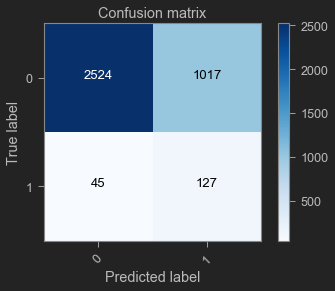

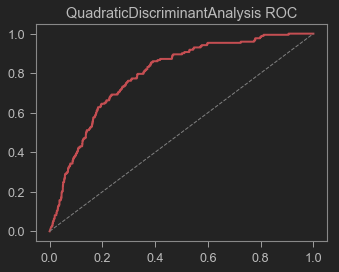

In [201]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

param_grid = {
    'priors':[2], 
    'reg_param':[0.911],
#     'tol':[0.0001]
}


LDA = GridSearchCV(QuadraticDiscriminantAnalysis(),param_grid,cv=sfk,scoring='roc_auc')
LDA.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (LDA.best_score_, LDA.best_estimator_))

LDA_best = LDA.best_estimator_
train_score = LDA_best.score(train_x,train_y)
test_score = LDA_best.score(test_x,test_y)
y_pred = LDA_best.predict(test_x)
y_pred_prob = LDA_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(LDA_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)


In [202]:
# save model
import pickle
with open("./best_models/LDA_pkl.txt",'wb') as f:
    pickle.dump(LDA_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
LDA_cv_auc = cross_val_score(LDA_best,X,y,cv=5,scoring="roc_auc")
print("best_LDA_cv_auc:",LDA_cv_auc)

F:\Anaconda3\lib\site-packages\sklearn\base.py:115: DeprecationWarning: Estimator QuadraticDiscriminantAnalysis modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
F:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
F:\Anaconda3\lib\site-packages\sklearn\base.py:115: DeprecationWarning: Estimator QuadraticDiscriminantAnalysis modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
F:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
F:\Anaconda3\lib\site-packages\sklearn\base.py:115: DeprecationWarning: Estimator QuadraticDiscriminantAnalysis modifies par

best_LDA_cv_auc: [0.77966206 0.78624965 0.8102937  0.76345521 0.79018657]


F:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# label propagation

In [ ]:
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
y = y.replace(0,-1)
train_x,test_x,train_y,test_y = train_test_split(X,y,stratify=y)
sfk = StratifiedKFold(n_splits=3,shuffle=True,random_state=111)
param_grid = {
    'kernel':['rbf','knn'],
#     'gamma':[20],
#     'n_neighbors':[7],
#     'alpha':[0.2],
#     'max_iter':[30],
}

LPG = LabelSpreading(kernel ='rbf',gamma = 20, n_neighbors = 7,alpha = 0.2,max_iter = 30,tol = 0.001,n_jobs = 1)
LPG.fit(train_x,train_y)
train_score = LPG.score(train_x,train_y)
test_score = LPG.score(test_x,test_y)
y_pred = LPG.predict(test_x)

In [ ]:
# y_pred_prob = LPG.predict_proba(test_x)
# cm = confusion_matrix(test_y,y_pred)

# eval_info(LPG,test_y,y_pred_prob,cm)
# print( "train_score:",train_score,"\n","test_score:",test_score)

# PCA

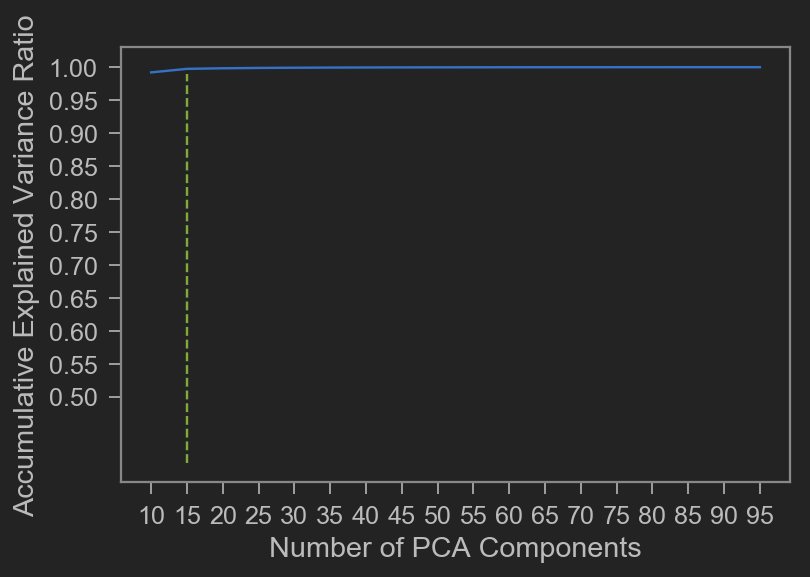

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
n_components = range(10,100,5)
acc_explained_ratio = []

for n in n_components:
    pca = PCA(n_components=n)
    pca.fit_transform(X)
    acc_explained_ratio.append(np.sum(pca.explained_variance_ratio_))
plt.figure(figsize=(6,4),dpi=144)
plt.plot(n_components,acc_explained_ratio)
plt.xlabel("Number of PCA Components")
plt.ylabel("Accumulative Explained Variance Ratio")
plt.yticks(np.arange(0.5,1.05,0.05))
plt.xticks(np.arange(0,100,5))
plt.plot((15,15),(0.4,0.99),"g--")
plt.show()

In [39]:
n_components = 15
pca_model = PCA(n_components=n_components).fit(train_x)
pca_train_x = pca_model.transform(train_x)
pca_test_x = pca_model.transform(test_x)
param_grid = {"C":[1,5,10,50],"gamma":[0.0001,0.0005,0.001,0.005,0.01],
              "kernel":["rbf"],"class_weight":["balanced"]}
SVC_PCA_model = GridSearchCV(SVC(),param_grid,verbose=2,n_jobs=4)
SVC_PCA_model.fit(pca_train_x,train_y)
print("-----SVM Classifier(PCA)------\n",
      "best param:{0}\nbest score:{1}".format(SVC_PCA_model.best_params_,SVC_PCA_model.best_score_))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   54.7s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  1.5min finished


-----SVM Classifier(PCA)------
 best param:{'C': 50, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
best score:0.79575


In [41]:
y_pred = SVC_PCA_model.best_estimator_.predict(pca_test_x)
print("------Confusion Matrix------\n",confusion_matrix(test_y,y_pred))
print("-----Classification_report-----\n",classification_report(test_y,y_pred))

------Confusion Matrix------
 [[2281  585]
 [  78   56]]
-----Classification_report-----
              precision    recall  f1-score   support

          0       0.97      0.80      0.87      2866
          1       0.09      0.42      0.14       134

avg / total       0.93      0.78      0.84      3000



# K-Means

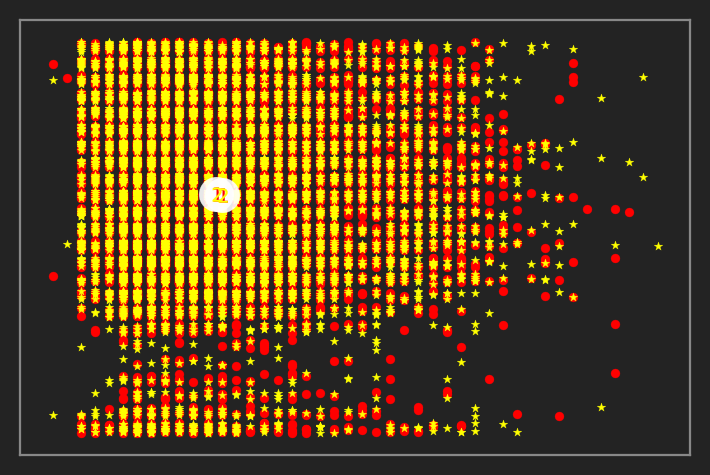

In [39]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2)
kmean.fit(X)
kmean_score = kmean.score(X)

labels = kmean.labels_
centers = kmean.cluster_centers_
plt.figure(figsize=(6,4),dpi=144)
plt.xticks(())
plt.yticks(())
plt.scatter(X[labels==0].iloc[:,0],X[labels==0].iloc[:,1],marker="o",s=20,c="red")
plt.scatter(X[labels==1].iloc[:,0],X[labels==1].iloc[:,1],marker="*",s=20,c="yellow")
plt.scatter(centers[:,0],centers[:,1],marker="o",c="white",alpha=0.9,s=300)
plt.scatter(centers[:,0],centers[:,1],marker="$1$",c="red",s=50)
plt.scatter(centers[:,0],centers[:,1],marker="$2$",c="yellow",s=50)

In [40]:
from sklearn.metrics import adjusted_rand_score,homogeneity_score,completeness_score,v_measure_score
AR_score = adjusted_rand_score(y,labels)
H_score = homogeneity_score(y,labels)
C_score = completeness_score(y,labels)
V_score = v_measure_score(y,labels)
print("Adjusted Rand-Index:",AR_score,"\n",
     "Homogeneity Score:",H_score,"\n",
     "Completeness Score:",C_score,"\n",
     "V-measure Score:",V_score)

Adjusted Rand-Index: 0.0027599712496652125 
 Homogeneity Score: 0.01662842545061333 
 Completeness Score: 0.004487396252852615 
 V-measure Score: 0.0070675283307278045


# KNN

------KNeighborsClassifier------
elaspe: 305.2950389313734 
 train_score: 0.9540508947037137 
 test_score: 0.9538834951456311
------classification_report------
              precision    recall  f1-score   support

          0       0.95      1.00      0.98      3537
          1       0.00      0.00      0.00       171

avg / total       0.91      0.95      0.93      3708

auc: 0.5
auc: 0.7692927068401377
Confusion matrix, without normalization
[[3537    0]
 [ 171    0]]


F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


------KNeighborsClassifier------
elaspe: 305.5213248479308 
 train_score: 1.0 
 test_score: 0.953344120819849
------classification_report------
              precision    recall  f1-score   support

          0       0.95      1.00      0.98      3537
          1       0.25      0.01      0.01       171

avg / total       0.92      0.95      0.93      3708

auc: 0.5024998883978394
auc: 0.7692927068401377
Confusion matrix, without normalization
[[3534    3]
 [ 170    1]]
------RadiusNeighborsClassifier------
elaspe: 436.63880084495827 
 train_score: 0.9538710547612624 
 test_score: 0.9538834951456311
------classification_report------
              precision    recall  f1-score   support

          0       0.95      1.00      0.98      3537
          1       0.00      0.00      0.00       171

avg / total       0.91      0.95      0.93      3708

auc: 0.5
auc: 0.7692927068401377
Confusion matrix, without normalization
[[3537    0]
 [ 171    0]]


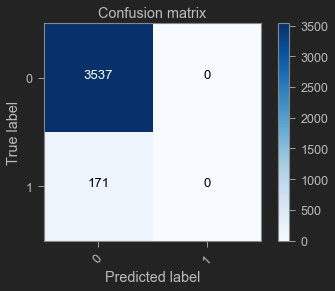

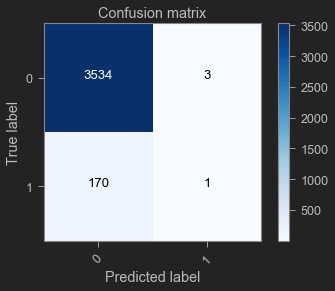

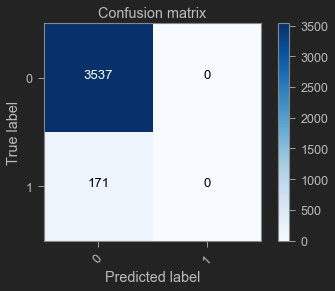

In [29]:
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
knn_model1 = KNeighborsClassifier(n_neighbors=10)
knn_model2 = KNeighborsClassifier(n_neighbors=10,weights="distance")
knn_model3 = RadiusNeighborsClassifier(n_neighbors=10,radius=1000.0)

models = [knn_model1,knn_model2,knn_model3]
for knn in models:
    start = time.clock()
    knn.fit(train_x,train_y)
    train_score = knn.score(train_x,train_y)
    test_score = knn.score(test_x,test_y)
    y_pred = knn.predict(test_x)
    print("------"+knn.__class__.__name__+"------\n"
          "elaspe:",time.clock()-start,"\n",
          "train_score:",train_score,"\n",
          "test_score:",test_score)
    cm = confusion_matrix(test_y,y_pred)
    eval_info(test_y,y_pred,y_score,cm)

# naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
import time

GNB = GaussianNB()
BNB = BernoulliNB()
# models = [GNB,BNB]
# for NB in models:
start = time.clock()
GNB.fit(train_x,train_y)
train_score = GNB.score(train_x,train_y)
test_score = GNB.score(test_x,test_y)
print("elaspe:",time.clock()-start,"\n",
          "train_score:",train_score,"\n",
          "test_score:",test_score)
# y_pred = GNB.predict(test_x)
y_pred_prob1 = GNB.predict_proba(test_x)[:,1]

start = time.clock()
BNB.fit(train_x,train_y)
train_score = BNB.score(train_x,train_y)
test_score = BNB.score(test_x,test_y)
print("elaspe:",time.clock()-start,"\n",
          "train_score:",train_score,"\n",
          "test_score:",test_score)
# y_pred = GNB.predict(test_x)
y_pred_prob2 = BNB.predict_proba(test_x)[:,1]

y_pred_prob = y_pred_prob1 + y_pred_prob2
y_pred = np.where(y_pred_prob>0.5,1,0)

cm = confusion_matrix(test_y,y_pred)
eval_info(NB,test_y,y_pred_prob,cm)